In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import string
from sklearn.cluster import KMeans


In [118]:
movies = pd.read_csv(r'C:\Users\mirza\Desktop\dataset\MovieLens-Credits\movies_metadata.csv', 
        encoding = "ISO-8859-1"
    )

movies = movies[movies["id"].apply(lambda x: x.isnumeric())]
movies["id"]= movies["id"].astype(int)
movies.rename(columns = {'id':"itemId"}, inplace = True)

import ast

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    
    return L
movies["genres"]= movies["genres"].apply(convert)

ratings_data= pd.read_csv(
        r'C:\Users\mirza\Desktop\dataset\MovieLens-Credits\ratings.csv',
        encoding = "ISO-8859-1",
        header = 0,
        names=["userId", "itemId", "rating", 'timestamp']
    )
ratings_data = pd.merge(ratings_data[["userId","itemId","rating"]], movies[["itemId","genres", "title"]], how="inner", on="itemId")

#ratings = ratings_data[["userId","itemId", "rating"]]

#ratings = ratings[ratings["rating"]==5]

ratings_data = ratings_data[ratings_data["rating"]>=4]
ratings_data

C:\Users\mirza\AppData\Local\Temp\ipykernel_10644\1251067961.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(r'C:\Users\mirza\Desktop\dataset\MovieLens-Credits\movies_metadata.csv',


,userId,itemId,rating,genres,title
2,22,110,5.0,"[Drama, Mystery, Romance]",Three Colors: Red
3,24,110,5.0,"[Drama, Mystery, Romance]",Three Colors: Red
5,30,110,5.0,"[Drama, Mystery, Romance]",Three Colors: Red
7,34,110,5.0,"[Drama, Mystery, Romance]",Three Colors: Red
8,49,110,4.0,"[Drama, Mystery, Romance]",Three Colors: Red
...,...,...,...,...,...
11437608,259266,173153,5.0,"[TV Movie, Drama]",Phil Spector
11437612,263655,172469,4.5,[Comedy],Love & Air Sex
11437616,270441,166874,4.0,"[Crime, Mystery, Thriller]",Coincidence
11437622,268239,124091,4.0,"[Comedy, Drama]",The Legend of Kaspar Hauser


In [119]:
ratings_data['genres'] = ratings_data['genres'].astype(str).str.split(',').str[0]
ratings_data['genres']= ratings_data['genres'].str.replace('[{}]'.format(string.punctuation), '')
ratings_data

C:\Users\mirza\AppData\Local\Temp\ipykernel_10644\2049852789.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ratings_data['genres']= ratings_data['genres'].str.replace('[{}]'.format(string.punctuation), '')


,userId,itemId,rating,genres,title
2,22,110,5.0,Drama,Three Colors: Red
3,24,110,5.0,Drama,Three Colors: Red
5,30,110,5.0,Drama,Three Colors: Red
7,34,110,5.0,Drama,Three Colors: Red
8,49,110,4.0,Drama,Three Colors: Red
...,...,...,...,...,...
11437608,259266,173153,5.0,TV Movie,Phil Spector
11437612,263655,172469,4.5,Comedy,Love & Air Sex
11437616,270441,166874,4.0,Crime,Coincidence
11437622,268239,124091,4.0,Comedy,The Legend of Kaspar Hauser


In [120]:
idx = ratings_data[ratings_data["genres"]==""].index
ratings_data = ratings_data.drop(idx)

In [121]:
ratings_data.genres.value_counts()

Drama              1892855
Comedy             1026058
Action              787788
Crime               355840
Adventure           349372
Horror              237397
Thriller            204733
Fantasy             188600
Romance             124286
Documentary         122820
Science Fiction     114229
Animation            59757
Western              52939
Mystery              52609
Music                48755
Family               29090
War                  27459
TV Movie             25535
Foreign              16080
History               7514
Name: genres, dtype: int64

In [122]:
gen = ["Drama", "Comedy", "Action", "Crime", "Adventure", "Horror", "Fantasy", "Thriller",
       "Romance", "Science Fiction", "Documentary", "Animation", "Mystery", "Western", "Music"]
sample_data = []

def sample(data):
    for g in gen:
        genres_sample = data[data["genres"]==g].sample(n=40000, replace=False)
        sample_data.append(genres_sample)

In [123]:
sample(ratings_data)

In [124]:
ratings = pd.concat([sample_data[0], sample_data[1],  sample_data[2],  sample_data[3],  sample_data[4], 
                     sample_data[5],  sample_data[6],  sample_data[7],  sample_data[8],  sample_data[9],
                     sample_data[10], sample_data[11], sample_data[12], sample_data[13], sample_data[14], ratings_data[ratings_data["genres"]== "History"],
                    ratings_data[ratings_data["genres"]== "Foreign"], ratings_data[ratings_data["genres"]== "TV Movie"], ratings_data[ratings_data["genres"]== "War"],
                    ratings_data[ratings_data["genres"]== "Family"]])

In [125]:
usr= pd.DataFrame(ratings.userId.value_counts())
usr = usr[(usr["userId"]>=10) & (usr["userId"]<=15)]

In [126]:
usr = usr.reset_index(drop=False)
usr.drop("userId", axis = 1, inplace=True)
usr.rename(columns={"index":"userId"}, inplace=True)
usr=pd.merge(usr, ratings, how="inner", on="userId")


In [127]:
ratings = usr

In [128]:
from sklearn.utils import shuffle
ratings = shuffle(ratings)

In [129]:
ratings

,userId,itemId,rating,genres,title
123619,108954,2993,4.0,Mystery,One on Top of the Other
51155,72327,1090,4.5,Thriller,The Thirteenth Floor
75922,256299,4351,5.0,Crime,Bordertown
107697,270088,509,4.5,Romance,Notting Hill
29171,182027,2005,5.0,Music,Sister Act
...,...,...,...,...,...
113047,27349,5618,5.0,Romance,"Cousin, Cousine"
48049,251258,163,4.0,Thriller,Ocean's Twelve
68392,239696,4886,4.5,Crime,And Then There Were None
18382,73363,588,4.0,Horror,Silent Hill


In [130]:
movies_list = np.unique(ratings['itemId'])
ratings = ratings.loc[ratings['itemId'].isin(movies_list)]

users_list = np.unique(ratings['userId'])
ratings = ratings.loc[ratings['userId'].isin(users_list)]

users_fav_movies = ratings.loc[:, ['userId', 'itemId']]
users_fav_movies = ratings.reset_index(drop = True)

In [131]:
users = np.unique(users_fav_movies['userId'])
print(users.shape)

(10442,)


In [132]:
def moviesListForUsers(users, users_data):
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['itemId'])).split('[')[1].split(']')[0])
    return users_movies_list

In [133]:
users_fav_movies.T
users_movies_list = moviesListForUsers(users, users_fav_movies)

In [134]:
users_movies_list = moviesListForUsers(users, users_fav_movies)

In [167]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

<IPython.core.display.Javascript object>

C:\Users\mirza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,100046,100272,100287,101,101362,1018,101801,101904,102,...,987,988,99,991,99106,992,993,99367,994,996
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
from sklearn.decomposition import PCA
pca=PCA(2)
sparseMatrix = pca.fit_transform(sparseMatrix)

In [169]:
sparseMatrix

array([[-0.71776061, -0.27922169],
       [ 0.12094159, -0.09567129],
       [ 0.22706302, -0.09734513],
       ...,
       [-0.39229542, -0.03068442],
       [ 0.34557097, -0.44264016],
       [-0.03690174,  0.16654223]])

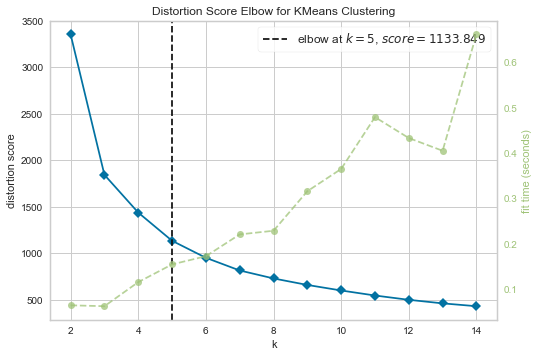

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [170]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(sparseMatrix)        # Fit the data to the visualizer
visualizer.show()   

In [196]:
kmeans = KMeans(n_clusters=5, init = 'k-means++')
clusters = kmeans.fit_predict(sparseMatrix)

In [197]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,10432,10433,10434,10435,10436,10437,10438,10439,10440,10441
userId,12,20,34,46,47,53,62,65,160,271,...,270564,270565,270684,270697,270740,270746,270750,270776,270795,270828
Cluster,2,0,0,0,2,2,4,4,0,2,...,0,4,0,2,2,4,4,0,1,0


In [198]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['itemId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['itemId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies

In [199]:
cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [200]:
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,...,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509
itemId,48780,68954,111759,97938,3578,4975,3114,5618,2011,4011,...,26849,26644,26663,26694,26700,26719,26755,26803,26842,173467
Count,1398,1045,449,407,387,351,345,286,228,225,...,1,1,1,1,1,1,1,1,1,1


In [201]:
for i in range(5):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  3245
Users in Cluster 1 ->  1772
Users in Cluster 2 ->  2688
Users in Cluster 3 ->  958
Users in Cluster 4 ->  1779


In [202]:
def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['itemId'])

def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['itemId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'itemId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster



In [203]:
movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 7)

In [204]:
j = 0
for i in range(8):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    if len_users <= 6:
        print('Users in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j)


Users in Cluster 5 ->  0
Users in Cluster 6 ->  0
Users in Cluster 7 ->  0
Total Cluster which we want to remove ->  3


In [205]:
for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  3245
Users in Cluster 1 ->  1772
Users in Cluster 2 ->  2688
Users in Cluster 3 ->  958
Users in Cluster 4 ->  1779


In [206]:
for i in range(len(movies_df_fixed)):
    print('Total movies in Cluster ' + str(i) + ' -> ', movies_df_fixed[i].shape[0])

Total movies in Cluster 0 ->  2196
Total movies in Cluster 1 ->  1510
Total movies in Cluster 2 ->  1645
Total movies in Cluster 3 ->  1042
Total movies in Cluster 4 ->  1480


In [207]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


labels = kmeans.labels_


print("Silhouette Score : {}".format(silhouette_score(sparseMatrix, labels, metric = 'euclidean')))
print("Davies Bouldin Score : {}".format(davies_bouldin_score(sparseMatrix , labels)))

Silhouette Score : 0.39981977697321025
Davies Bouldin Score : 0.850690351080259


In [209]:
clusters= [0,1,2,3,4]
for i in clusters:
    movies_df_fixed[i] = pd.merge(movies_df_fixed[i], content_based_data[["itemId","title","genres"]], how="inner", on="itemId" )

In [214]:
pickle.dump(movies_df_fixed, open("movies_clusters.pkl","wb" ))
pickle.dump(clusters_fixed, open("users_clusters.pkl","wb" ))